# Comparison of the BOO and eCD gate for different parameter sets

This notebook compares the BOO and eCD gate with different protocol times and scales of pulses. The .txt files including the fidelities are already produced in the files "boo_accelerated_scaled.ipynb" and "ecd_accelerated_scaled.ipynb".

## Preliminaries

In [2]:
#Package importation
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec

from matplotlib import cm
from matplotlib.legend_handler import HandlerTuple
from helpers import *

In [3]:
# Load the data
infids_acc_boo = np.loadtxt('../data/infids_acc_boo_20x20.txt')
infids_acc_ecd = np.loadtxt('../data/infids_acc_ecd_20x20.txt')

## Make plot

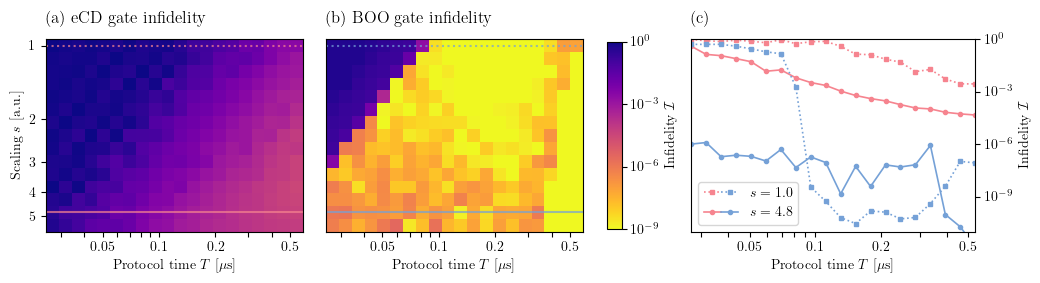

In [4]:
# Make a new figure
fig = plt.figure(figsize=(12, 2.5))
gs = gridspec.GridSpec(1, 4, width_ratios=[1, 1, 0.25, 1.1], wspace=0.1)

# Assign subplots to the grid
ax0 = fig.add_subplot(gs[0])
ax1 = fig.add_subplot(gs[1])
ax2 = fig.add_subplot(gs[3])
pos1 = ax1.get_position() # Get position of second subplot (ax1)
cax = fig.add_axes([pos1.x1 + 0.02, 0.12, 0.012, 0.75]) # [left, bottom, width, height] in figure coords

# Normalize the colormaps
norm_boo = mpl.colors.LogNorm(vmin = 1e-9, vmax = 1)
norm_ecd = mpl.colors.LogNorm(vmin = 1e-9, vmax = 1)

# show eCD cmap plot
cmap0 = ax0.imshow(infids_acc_ecd[1:16], norm = norm_ecd, cmap = 'plasma_r')
cmap1 = ax1.imshow(infids_acc_boo[1:16], norm = norm_boo, cmap = 'plasma_r')
fig.colorbar(cmap1, cax=cax, label='Infidelity $\\mathcal{I}$')

# Make the slices plot
slice1, slice2 = 1, 14
handles, labels = [], []
handle_ecd1 = ax2.plot(infids_acc_ecd[0], infids_acc_ecd[slice1], label='ecd, 1', color=col0, ls=':', lw=1.2, marker='s', markersize=3)
handle_ecd2 = ax2.plot(infids_acc_ecd[0], infids_acc_ecd[slice2], label='ecd, 5.4', color=col0, ls='-', lw=1.2, marker='o', markersize=3)
handle_boo1 = ax2.plot(infids_acc_boo[0]*1e6, infids_acc_boo[slice1], label='boo, 1', color=col1, ls=':', lw=1.2, marker='s', markersize=3)
handle_boo2 = ax2.plot(infids_acc_boo[0]*1e6, infids_acc_boo[slice2], label='boo, 5.4', color=col1, ls='-', lw=1.2, marker='o', markersize=3)

# Format axes
ax2.set_xlim(infids_acc_ecd[0,0], infids_acc_ecd[0,-1])
ax2.set_ylim(1e-11, 1)
ax2.set_xlabel('Protocol time $T$ [$\\mu$s]')
ax2.set_ylabel('Infidelity $\\mathcal{I}$')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.set_title('(c)', loc='left', pad = 12)
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# create mashed labels for last subplots
handles = [tuple([handle_ecd1[0], handle_boo1[0]]), tuple([handle_ecd2[0], handle_boo2[0]])]
scales  = np.logspace(0, 1, 20)
labels = [f'$s={scales[slice1-1]}$', f'$s={np.round(scales[slice2-1], 1)}$']

ax2.legend(handles, labels, 
           handler_map={tuple: HandlerTuple(None, pad=0)}, 
           loc='lower left', 
           #bbox_to_anchor=(1, 1), 
           handlelength=2.5, 
           alignment='left')

#ax2.legend()

# Define Auxilliary quantities for ticks and labels
T0         = infids_acc_ecd[0, -1]
grid_ecd   = len(infids_acc_ecd) - 1
y_size_ecd = len(infids_acc_ecd[1:16])
x_size_ecd = len(infids_acc_ecd[1:])
x_size_boo = len(infids_acc_boo[1:])

ax0.hlines(slice1-1, -.5, x_size_ecd-.5, color=col0, ls=':', alpha=.7)
ax0.hlines(slice2-1, -.5, x_size_ecd-.5, color=col0, ls='-', alpha=.7)
ax1.hlines(slice1-1, -.5, x_size_boo-.5, color=col1, ls=':', alpha=.7)
ax1.hlines(slice2-1, -.5, x_size_boo-.5, color=col1, ls='-', alpha=.7)

# Set the ticks on the axes to fit to the log scaling
Tticks = np.concatenate((np.linspace(0.03, 0.09, 7), np.linspace(0.1, 0.5, 5)))
Sticks = np.linspace(1, 5, 5)

ax0.set_xticks((x_size_ecd-1)*np.log(20*Tticks/T0)/np.log(20))
ax0.set_xticklabels(['', '', '0.05', '', '', '', '', '0.1', '0.2', '', '', '0.5'], rotation = 0)
ax1.set_xticks((x_size_boo-1)*np.log(20*Tticks/T0)/np.log(20))
ax1.set_xticklabels(['', '', '0.05', '', '', '', '', '0.1', '0.2', '', '', '0.5'], rotation = 0)
ax2.set_xticks(Tticks)
ax2.set_xticklabels(['', '', '0.05', '', '', '', '', '0.1', '0.2', '', '', '0.5'], rotation = 0)

cax.set_yticks(np.logspace(-9, 0, 4))
ax2.set_yticks(np.logspace(-9, 0, 4))

ax1.get_yaxis().set_visible(False)
ax0.set_yticks((y_size_ecd-1)*np.log(Sticks)/np.log(scales[14]))
ax0.set_yticklabels(['1', '2', '3', '4', '5'], rotation = 0)

# Set the axis labels and titles
ax0.set_xlabel('Protocol time $T$ [$\\mu$s]')
ax1.set_xlabel('Protocol time $T$ [$\\mu$s]')
ax0.set_ylabel('Scaling $s$ [a.u.]')
ax0.set_title('(a) eCD gate infidelity', loc='left', pad = 12)
ax1.set_title('(b) BOO gate infidelity', loc='left', pad = 12)

# Show the Plot
plt.savefig('../figures/fig1.pdf', format = 'pdf', facecolor='white', bbox_inches='tight', dpi = 300)
plt.show()